# 7 - Model evaluation
#   🗺️ --> 📈 🎯

**OBJECTIVE:** This represents a critical step of any "good" ML research and it consists of evaluating the model's performance on new data (i.e. test data) for which we have high quality annotations.

**INPUT:**
- `test data`= path to directory where predicted labels (output from step 5) are stored.
- `path_to_detected_boxes`= path to tile index that can be used to convert to YOLO formatted bounding box coordinates to UTM

**OUTPUT:**
- a geoJSON file that includes all predicted bounding boxes with class name and class probability

In [5]:
#annotator_ID=3 # change this to your folder ID

path_to_model="/content/drive/MyDrive/NOVA_course_deep_learning_Original/data/annotated_data/train/full_data/all_data/seedlings_YOLOn_img640_100ep/weights/best.pt"
path_to_yaml= "/content/drive/MyDrive/NOVA_course_deep_learning_Original/data/annotated_data/train/full_data/all_data/train_config.yaml"

#path_to_tile_index=path_to_predicted+ "/ortho_hobol_042222_mavic_sun_tile_index.shp"#+os.path.basename(path_to_predicted)+".shp"
#buffer_size_m=1

## 7.1 load required libraries

In [6]:
!pip install geopandas
%pip install ultralytics
import ultralytics
ultralytics.checks()

# general libraries
import os, glob
from pathlib import Path

# Geospatial libraries
import geopandas as gpd
from osgeo import gdal, osr
from shapely.geometry import Polygon


Ultralytics YOLOv8.0.124 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.1/107.7 GB disk)


In [7]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## 7.2 Validate using YOLOv8 builtin "val" function
this provides a standard method for validation of bounding box detectors



In [ ]:
!zip -r /content/drive/MyDrive/NOVA_Deep_Learning.zip /content/drive/MyDrive/NOVA_course_deep_learning_Original

In [8]:
!yolo val model=$path_to_model data=$path_to_yaml split='test' imgsz=640 project="/content/drive/MyDrive/NOVA_course_deep_learning_Original/data/testing" name="test_eval_full_100epochs" conf=0.0068

Ultralytics YOLOv8.0.124 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/NOVA_course_deep_learning_Original/data/annotated_data/test/labels.cache... 199 images, 199 backgrounds, 28 corrupt: 100% 398/398 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/MyDrive/NOVA_course_deep_learning_Original/data/annotated_data/test/images/galbyveien_20230504_sun_11_23.tif: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0109]
val: WARNING ⚠️ /content/drive/MyDrive/NOVA_course_deep_learning_Original/data/annotated_data/test/images/galbyveien_20230504_sun_11_24.tif: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0079]
val: WARNING ⚠️ /content/drive/MyDrive/NOVA_course_deep_learning_Original/data/annotated_data/test/images/galbyveien_20230504_sun_12_21.tif: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.006

In [ ]:
path_to_yaml

'/content/drive/MyDrive/NOVA_course_deep_learning/data/annotated_data/train/3/train_config.yaml'

## 7.3 Now let's understand how this is done
- The predicted boxes are overlayed to the true labels and the IoU is computed.
- A match is found when the IoU > 0.5

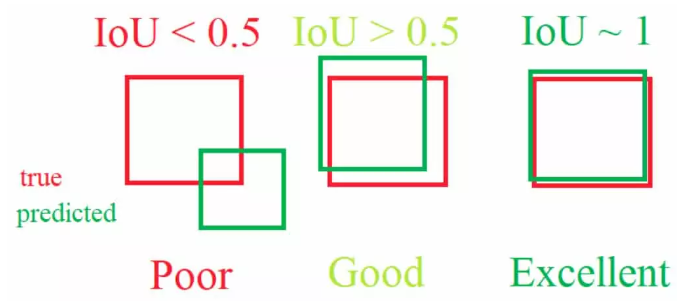

- Building the confusion matrix


- Compute metrics from confusion matrix

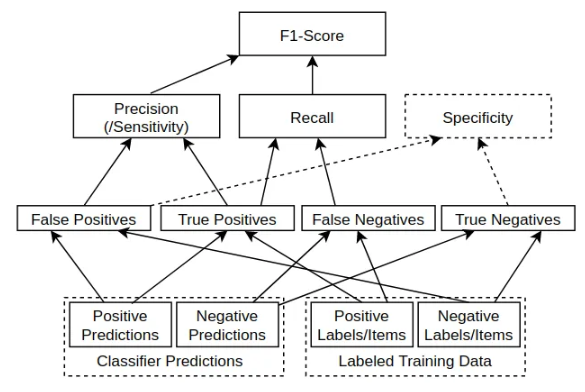
image.png

image.png

**Precision**: Precision is a measure of how many of the positive predictions made are correct (true positives). The formula for it is:


image.png

**Recall**: Recall is a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data. It is sometimes also referred to as Sensitivity. The formula for it is:

image.png




**F1-score**: F1-Score is a measure combining both precision and recall. It is generally described as the harmonic mean of the two. Harmonic mean is just another way to calculate an “average” of values, generally described as more suitable for ratios (such as precision and recall) than the traditional arithmetic mean. The formula used for F1-score in this case is:





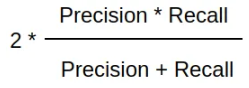


The idea is to provide a single metric that weights the two ratios (precision and recall) in a balanced way, requiring both to have a higher value for the F1-score value to rise. For example, a Precision of 0.01 and Recall of 1.0 would give :

- an arithmetic mean of (0.01+1.0)/2=0.505,
- F1-score score (formula above) of 2*(0.01*1.0)/(0.01+1.0)=~0.02.


This is because the F1-score is much more sensitive to one of the two inputs having a low value (0.01 here). Which makes it great if you want to balance the two.

*Some advantages of F1-score:*

Very small precision or recall will result in lower overall score. Thus it helps balance the two metrics.
If you choose your positive class as the one with fewer samples, F1-score can help balance the metric across positive/negative samples.
As illustrated by the first figure in this article, it combines many of the other metrics into a single one, capturing many aspects at once.